In [ ]:
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
from  PIL import Image
from matplotlib import pyplot as plt

# Orignal image

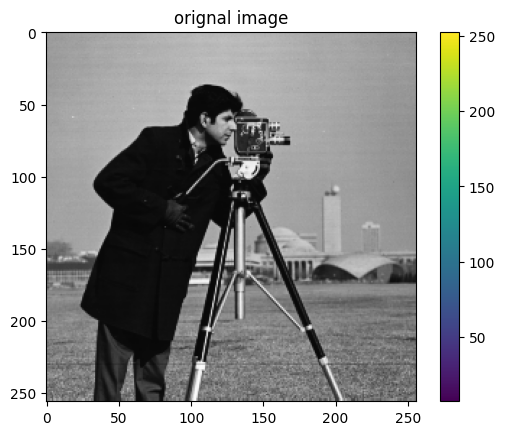

In [ ]:
# Load the image in grayscale
image = cv2.imread('/content/cameraman.bmp')
# Display the DCT coefficients
plt.imshow(image)
plt.title('orignal image')
plt.colorbar()
plt.show()

# DCT image

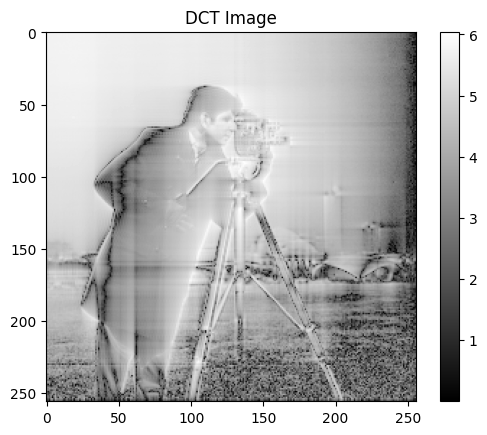

In [ ]:
# Load the image in grayscale
image = cv2.imread('/content/cameraman.bmp', cv2.IMREAD_GRAYSCALE)

# Apply DCT
dct_image = cv2.dct(cv2.dct(np.float32(image)))

# Display the DCT coefficients
plt.imshow(np.log(1 + np.abs(dct_image)), cmap='gray')
plt.title('DCT Image')
plt.colorbar()
plt.show()


# IDCT image

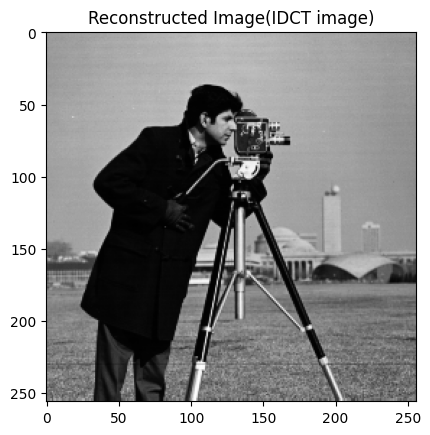

In [ ]:
def idct2(block):
    # Apply 2D IDCT to the block
    return cv2.idct(cv2.idct(np.float32(block)))

# Apply IDCT to the DCT coefficients
reconstructed_image = idct2(dct_image)

# Display the reconstructed image
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image(IDCT image)')
plt.show()


# All performance

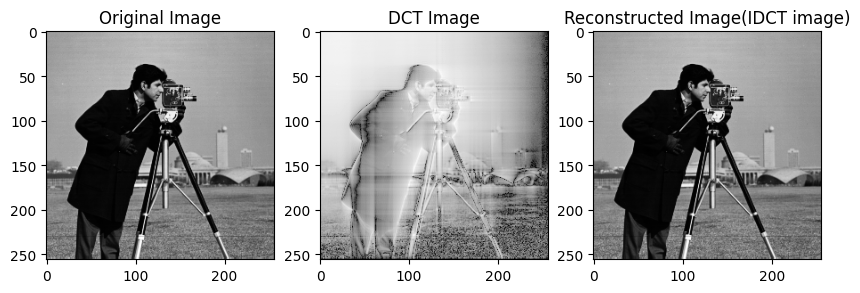

In [ ]:
def dct2(block):
    # Apply 2D DCT to the block
    return cv2.dct(cv2.dct(np.float32(block)))

def idct2(block):
    # Apply 2D IDCT to the block
    return cv2.idct(cv2.idct(np.float32(block)))

# Load the original image
image = cv2.imread('/content/cameraman.bmp', cv2.IMREAD_GRAYSCALE)

# Apply DCT to the image
dct_image = dct2(image)

# Apply IDCT to the DCT image
idct_image = idct2(dct_image)

# Display the original image, DCT image, and reconstructed image
plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(np.log(1 + np.abs(dct_image)), cmap='gray')
plt.title('DCT Image')

plt.subplot(133)
plt.imshow(idct_image, cmap='gray')
plt.title('Reconstructed Image(IDCT image)')

plt.show()


# Matrix

In [ ]:
import numpy as np

# Define the array I
I = np.array([154, 123, 123, 123, 123, 123, 123, 136, 192, 180, 136, 154, 154, 154, 136,
              110, 254, 198, 154, 154, 180, 154, 123, 123, 239, 180, 136, 180, 180, 166,
              123, 123, 180, 154, 136, 167, 166, 149, 136, 136, 128, 136, 123, 136, 154,
              180, 198, 154, 123, 105, 110, 149, 136, 136, 180, 166, 110, 136, 123, 123,
              123, 136, 154, 136])

# Subtract 128 from I to get M
M = I - 128

# Initialize matrix T with zeros
T = np.zeros((8, 8))

# Fill in the values of T based on conditions
for i in range(8):
    for j in range(8):
        if i == 0:
            T[i, j] = np.sqrt(1/8)
        else:
            T[i, j] = np.sqrt(2/8) * np.cos(((2*j)+1)*i*np.pi/16)

# Calculate matrix D
D = np.dot(np.dot(T, M.reshape(8,8)), T.T)

# Define matrix Q
Q = np.array([16, 11, 10, 16, 24, 40, 51, 61, 12, 12, 14, 19, 26, 58, 60, 55, 14, 13, 16,
              24, 40, 57, 69, 56, 14, 17, 22, 29, 51, 87, 80, 62, 18, 22, 37, 56, 68, 109,
              103, 77, 24, 35, 55, 64, 81, 104, 113, 92, 49, 64, 78, 87, 103, 121, 120, 101,
              72, 92, 95, 98, 112, 100, 103, 99])
Q = Q.reshape((8, 8))

C = np.round(D / Q)

# Calculate matrix R
R = Q * C

# Calculate matrix N
N = np.round(np.dot(np.dot(T.T, R), T) + 128)

# Print or use the results as needed
print("Matrix M:")
print(M)

print("\nMatrix Q:")
print(Q)

print("\nMatrix D:")
print(D)

print("\nMatrix C:")
print(C)

print("\nMatrix R:")
print(R)

print("\nMatrix I:")
print(I)

print("\nMatrix N:")
print(N)




Matrix M:
[ 26  -5  -5  -5  -5  -5  -5   8  64  52   8  26  26  26   8 -18 126  70
  26  26  52  26  -5  -5 111  52   8  52  52  38  -5  -5  52  26   8  39
  38  21   8   8   0   8  -5   8  26  52  70  26  -5 -23 -18  21   8   8
  52  38 -18   8  -5  -5  -5   8  26   8]

Matrix Q:
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]

Matrix D:
[[ 1.62250000e+02  4.05989816e+01  2.00026918e+01  7.23294009e+01
   3.02500000e+01  1.24848354e+01 -1.96505043e+01 -1.14971452e+01]
 [ 3.04792937e+01  1.08415970e+02  1.04730992e+01  3.22925175e+01
   2.76990885e+01 -1.55048925e+01  1.84075948e+01 -1.99566961e+00]
 [-9.41445075e+01 -6.00511329e+01  1.22980970e+01 -4.34188963e+01
  -3.12878702e+01  6.06690905e+00 -3.33058262e+00  7.14403453e+00]
 [-3.85675018e+01 -8.335751